<a href="https://colab.research.google.com/github/truongthuanr/self-project/blob/main/05_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Information


**Data:** 
* Kaggle: [Amazon Fine Food Reviews](https://www.kaggle.com/snap/amazon-fine-food-reviews)

**Problem:**
* To determine whether a review is positive or negative

**Reference:**
* [A Beginner’s Guide to Sentiment Analysis](https://towardsdatascience.com/a-beginners-guide-to-sentiment-analysis-in-python-95e354ea84f6)
* [A Complete Step by Step Tutorial on Sentiment Analysis in Keras and Tensorflow](https://towardsdatascience.com/a-complete-step-by-step-tutorial-on-sentiment-analysis-in-keras-and-tensorflow-ea420cc8913f)
* [A Step-by-Step Tutorial for Conducting Sentiment Analysis](https://towardsdatascience.com/a-step-by-step-tutorial-for-conducting-sentiment-analysis-a7190a444366)

# Import data

In [6]:
import pandas as pd

Read data from url

In [7]:
df_org = pd.read_csv("/content/drive/MyDrive/01_Personal/01_Study/01_ML/03_FoodReviews/Dataset/Reviews.csv")

In [8]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [9]:
df_org.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Exploratory Data Analysis 

In [10]:
# Import Plotly library
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Check null data

In [11]:
df_org.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [12]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


There are 43 row contain na data, very small than total 568454 row. -> Delete row have NA data

In [13]:
df_org.dropna(axis=0, inplace=True)

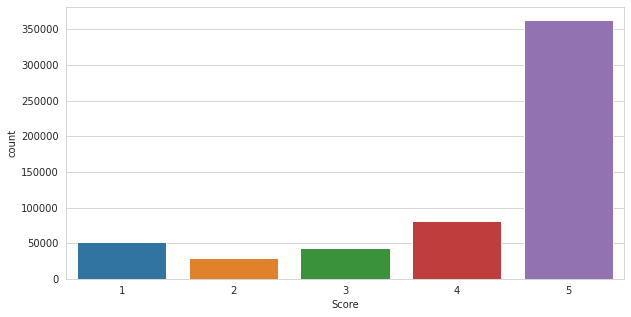

In [14]:
# Check product score
fig = plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
ax = sns.countplot(x=df_org["Score"])

Almost review is scored by 5 -> most customer rating positive.

Get 10% data for analyze to optimize time

In [15]:
num = round(len(df_org)*0.1)
df = df_org.sample(frac=1, random_state=40)[:num]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56841 entries, 252319 to 472437
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      56841 non-null  int64 
 1   ProductId               56841 non-null  object
 2   UserId                  56841 non-null  object
 3   ProfileName             56841 non-null  object
 4   HelpfulnessNumerator    56841 non-null  int64 
 5   HelpfulnessDenominator  56841 non-null  int64 
 6   Score                   56841 non-null  int64 
 7   Time                    56841 non-null  int64 
 8   Summary                 56841 non-null  object
 9   Text                    56841 non-null  object
dtypes: int64(5), object(5)
memory usage: 4.8+ MB


Check the most frequently used word in the reviews...

In [17]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [18]:
# Create stopwords list
vocab = "".join(review for review in df.Text)
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
wordclouds = WordCloud(stopwords=stopwords).generate(vocab)

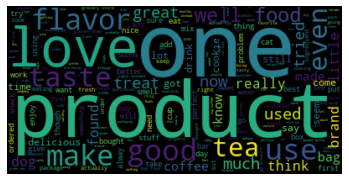

In [19]:
plt.imshow(wordclouds, interpolation='bilinear')
plt.axis("off")
plt.show()

Classify: 

Review with `Score` > 3 is positive

Review with `Score` < 3 is nagative

Review with `Score` = 3 is removed

In [20]:
df = df[df["Score"]!=3]
df["Sentiment"] = df["Score"].apply(lambda x : 1 if x>3 else -1)

Cheking again n/a data

In [21]:
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
Sentiment                 0
dtype: int64

See how many data have positive/negative through the count chart

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



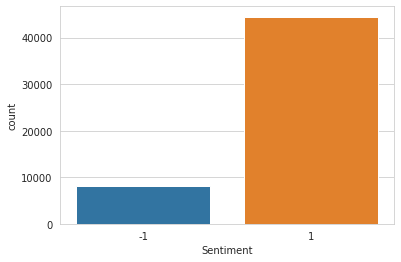

In [22]:
sns.countplot(df["Sentiment"])

More Exploratory Data

In [23]:
# split df - positive and negative sentiment:
positive = df[df['Sentiment'] == 1]
negative = df[df['Sentiment'] == -1]

WordCloud for positive review, see how often the words appear than others

(-0.5, 399.5, 199.5, -0.5)

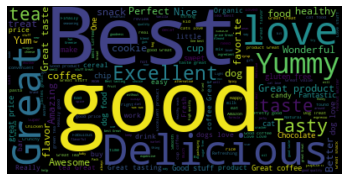

In [24]:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"]) 
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive.Summary)

wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")

WordCloud for nagative review

(-0.5, 399.5, 199.5, -0.5)

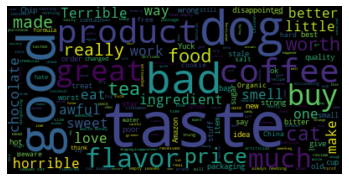

In [25]:
neg = "".join(review for review in negative.Summary)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)

plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")

Some word like [good, great, taste, coffee, ..] is in both negative and positive review

**Positive review:** contain the positive word such as "best, love, yummy, excellent, favorite,.."

**Negative review:** contain negative word such as "worth, bad, awful, waste, .."

# Pre-Process

**The preprocess following those step:**

1. Remove stop word/punctuation/lowercase
2. Tokenization/Vectorization
3. Tf-idf transform

Get the set of stop word

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [27]:
import string
from nltk.corpus import stopwords

In [28]:
df = df[["Summary","Sentiment"]]

In [29]:
df.head(10)

,Summary,Sentiment
453411,Good Stuff,1
185175,Decent for the price,1
307788,life saver,1
21597,Great Deal,1
64102,One cup coffee maker,1
115589,Great kitty food,1
275681,Trace of Casein??,-1
148538,For Mr. Picky Kitty,1
540687,Quality convenience food,1
268018,An aid for healthy living and eating!,1


## Split data to train and test data


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df["Summary"].to_numpy(), df["Sentiment"].to_numpy(), test_size=0.25, random_state=42)

## Tokenization and Vectorization

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
stopwords_list = stopwords.words('english')
stopwords_list.extend(['good', 'great'])
len(stopwords_list)

181

In [34]:
# Create a function to process the text
def text_process(mess):
  """
  Takes in a string of text, then performs the following:
  1. Remove all punctuation
  2. Remove all stop words
  3. Return a list of the cleaned text
  """
  # remove the punctuation in the string
  nopunc = [char for char in mess if char not in string.punctuation]
  nopunc = ''.join(nopunc)

  # remove all stop words
  stopwords_list = stopwords.words('english')
  stopwords_list.extend(['good', 'great'])
  ret = [word for word in nopunc.split() if word.lower() not in stopwords_list]

  return ret

In [35]:
# Quick check
df["Summary"].head(10).apply(text_process)

453411                           [Stuff]
185175                   [Decent, price]
307788                     [life, saver]
21597                             [Deal]
64102          [One, cup, coffee, maker]
115589                     [kitty, food]
275681                   [Trace, Casein]
148538                [Mr, Picky, Kitty]
540687      [Quality, convenience, food]
268018    [aid, healthy, living, eating]
Name: Summary, dtype: object

create the vetorizer

In [36]:
transformer = CountVectorizer(analyzer=text_process).fit(df["Summary"])

Check the total nember of vocabulary

In [37]:
# vocab size
len(transformer.vocabulary_)

18195

In [38]:
transformed_text = transformer.transform(df["Summary"])

In [39]:
print("Number of messages in  data: ", len(df["Summary"]))
print("Length of vocab: ",len(transformer.vocabulary_))
print("Shape of Sparse matrix: ", transformed_text.get_shape())

Number of messages in  data:  52565
Length of vocab:  18195
Shape of Sparse matrix:  (52565, 18195)


In [40]:
from sklearn.feature_extraction.text import TfidfTransformer

In [41]:
tfidf_transformer = TfidfTransformer().fit(transformed_text)
tfidf_messages = tfidf_transformer.transform(transformed_text)

In [42]:
print("shape of tfidf messages: ", tfidf_messages.shape)

shape of tfidf messages:  (52565, 18195)


# Model

## Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

Create pipeline model

In [44]:
from sklearn.pipeline import Pipeline

In [45]:
pipeline = Pipeline([
                     ('bagofword', CountVectorizer(analyzer=text_process)), #tokenize
                     #('tfidf', TfidfTransformer()), 
                     ('LogisticRegression', LogisticRegression(max_iter=1000)),
])

Train model by training dataset

In [46]:
# Train model
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bagofword',
                 CountVectorizer(analyzer=<function text_process at 0x7f218ba80050>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('LogisticRegression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    mul

Make prediction with the testing dataset

In [47]:
lr_preds = pipeline.predict(X_test) 

In [48]:
from sklearn.metrics import classification_report

Check the result by `classification_report`

In [49]:
print(classification_report(y_test, lr_preds))

              precision    recall  f1-score   support

          -1       0.81      0.39      0.52      1998
           1       0.90      0.98      0.94     11144

    accuracy                           0.89     13142
   macro avg       0.85      0.69      0.73     13142
weighted avg       0.89      0.89      0.88     13142



**The accuracy of the model is 89%. But remember that we also train with 10% number of data**

## MultinomialNB model

Create a MutinomialNB model

In [50]:
from sklearn.naive_bayes import MultinomialNB

In [51]:
# create pipeline
nb_pipeline = Pipeline([
                     ('bagofword', CountVectorizer(analyzer=text_process)), #tokenize
                     #('tfidf', TfidfTransformer()), 
                     ('classifier', MultinomialNB()),
])

Train model by the training data set

In [52]:
# Train model
nb_pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bagofword',
                 CountVectorizer(analyzer=<function text_process at 0x7f218ba80050>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

Make prediction

In [53]:
nb_preds = nb_pipeline.predict(X_test)

Check the result by `classification_report`

In [54]:
print(classification_report(y_test, nb_preds))

              precision    recall  f1-score   support

          -1       0.80      0.42      0.55      1998
           1       0.90      0.98      0.94     11144

    accuracy                           0.90     13142
   macro avg       0.85      0.70      0.75     13142
weighted avg       0.89      0.90      0.88     13142



Why the tf-idf reduce the accuracy? -> because of unbalancing data!!!|

**Train with full data**

In [58]:
df_full = df_org.copy()
df_full = df_full[df_full["Score"]!=3]
df_full["Sentiment"] = df_full["Score"].apply(lambda x : 1 if x>3 else -1)
df_full = df_full[["Summary","Sentiment"]]
X_full = df_full["Summary"]
y_full = df_full["Sentiment"]

# Split data to training set and testing set
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_full, y_full, test_size=0.25, random_state=42)

# -----  Logistic model  -----
# Train model
pipeline.fit(X_train_f, y_train_f)

# -----  MutinomialNB model  -----
nb_pipeline.fit(X_train_f, y_train_f)

Pipeline(memory=None,
         steps=[('bagofword',
                 CountVectorizer(analyzer=<function text_process at 0x7f218ba80050>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

Make the prediction and compare the result

In [59]:

# Predict
lr_preds = pipeline.predict(X_test_f)
print("Logistic Regrestion Model result.")
print(classification_report(y_test_f, lr_preds))
print("-------------------------------")

# Predict
nb_preds = nb_pipeline.predict(X_test_f)
print("Multinomial Model result.")
print(classification_report(y_test_f, nb_preds))

Logistic Regrestion Model result.
              precision    recall  f1-score   support

          -1       0.84      0.56      0.67     20452
           1       0.92      0.98      0.95    110992

    accuracy                           0.91    131444
   macro avg       0.88      0.77      0.81    131444
weighted avg       0.91      0.91      0.91    131444

-------------------------------
Multinomial Model result.
              precision    recall  f1-score   support

          -1       0.79      0.57      0.66     20452
           1       0.92      0.97      0.95    110992

    accuracy                           0.91    131444
   macro avg       0.86      0.77      0.81    131444
weighted avg       0.90      0.91      0.90    131444



**2 model have the same accuracy, but the f1-score of LogisticRegression model is better.**
